In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import glob

from fastai import *
from fastai.vision import *
import pandas as pd

import tarfile
import scipy.io
import numpy as np
import cv2
import os
import shutil
import random

from torchvision.models import *
from fastai.vision.models import *
from fastai.vision.learner import model_meta

import sys
import pretrainedmodels

In [3]:
path = Path('/home/amccarthy13/Documents/car-damage-dataset')

In [4]:
tfms = get_transforms(do_flip=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.2,
                      xtra_tfms=[brightness(change=(0.5*(1-0.1), 0.5*(1+0.1)), p=0.75),
                                 contrast(scale=(1-0.1, 1/(1-0.1)), p=0.75)])

data1 = ImageDataBunch.from_folder(path/'data1a','training','validation',ds_tfms=tfms, bs=64, size=612).normalize(imagenet_stats)

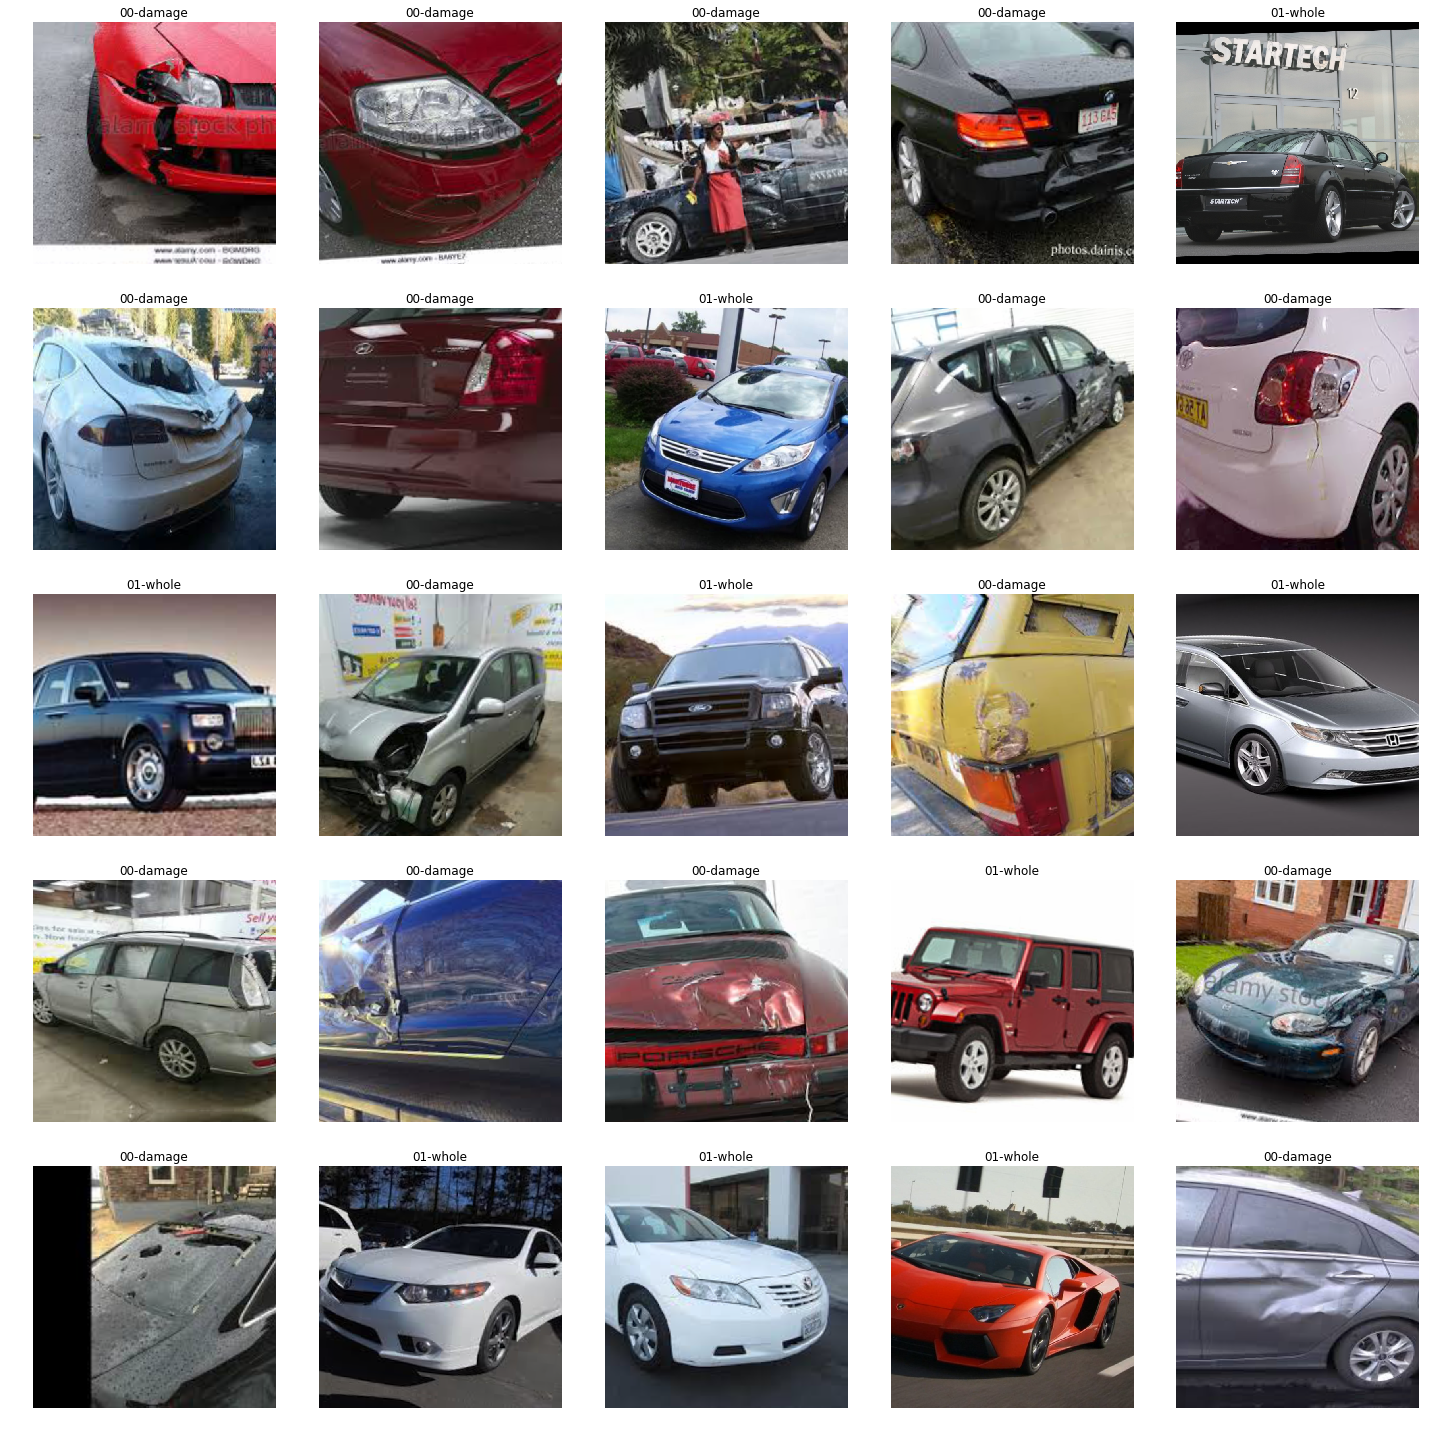

In [8]:
data1.show_batch()

In [5]:
print(len(data1.classes))
print(data1.classes)

2
['00-damage', '01-whole']


In [7]:
learn1 = create_cnn(data1, models.resnet34, pretrained=True, metrics=[error_rate, accuracy])
learn1.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


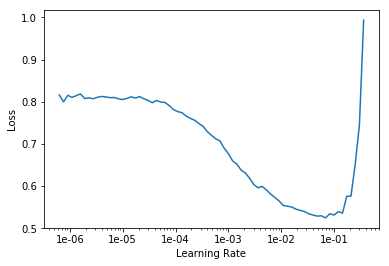

In [8]:
learn1.lr_find()
learn1.recorder.plot()

In [9]:
learn1.fit_one_cycle(10, slice(1e-3, 1e-2))

epoch,train_loss,valid_loss,error_rate,accuracy,time
1,0.388322,0.248306,0.095652,0.904348,00:28
2,0.304164,0.178513,0.076087,0.923913,00:27
3,0.258214,0.175649,0.086957,0.913043,00:27
4,0.246656,0.213487,0.084783,0.915217,00:27
5,0.212559,0.214906,0.089130,0.910870,00:27
6,0.183423,0.178631,0.063043,0.936957,00:27
7,0.159024,0.194376,0.082609,0.917391,00:27
8,0.136060,0.162734,0.060870,0.939130,00:27
9,0.119902,0.156602,0.063043,0.936957,00:27
10,0.102706,0.154158,0.058696,0.941304,00:27


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


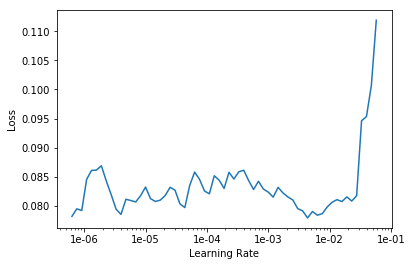

In [10]:
learn1.lr_find()
learn1.recorder.plot()

In [11]:
learn1.fit_one_cycle(10, slice(1e-5, 1e-4))

epoch,train_loss,valid_loss,error_rate,accuracy,time
1,0.078105,0.154015,0.056522,0.943478,00:27
2,0.085048,0.155173,0.063043,0.936957,00:26
3,0.086719,0.156814,0.054348,0.945652,00:27
4,0.082156,0.153831,0.058696,0.941304,00:27
5,0.092869,0.154694,0.058696,0.941304,00:27
6,0.082929,0.154485,0.058696,0.941304,00:28
7,0.083297,0.156843,0.056522,0.943478,00:27
8,0.081114,0.154789,0.063043,0.936957,00:27
9,0.085295,0.155768,0.063043,0.936957,00:26
10,0.084373,0.157009,0.060870,0.939130,00:26


In [8]:
data2 = ImageDataBunch.from_folder(path/'data1a','training','validation',ds_tfms=tfms, bs=64, size=412).normalize(imagenet_stats)
learn2 = create_cnn(data2, models.resnet50, pretrained=True, metrics=[error_rate, accuracy])

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


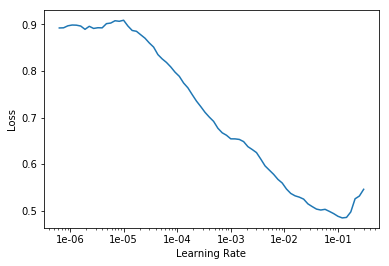

In [6]:
learn2.lr_find()
learn2.recorder.plot()

In [9]:
learn2.fit_one_cycle(10, slice(1e-3, 1e-2))

epoch,train_loss,valid_loss,error_rate,accuracy,time
1,0.328849,0.208890,0.082609,0.917391,00:23
2,0.259700,0.204578,0.084783,0.915217,00:23
3,0.210424,0.209657,0.071739,0.928261,00:22
4,0.180181,0.279491,0.108696,0.891304,00:23
5,0.156620,0.324741,0.106522,0.893478,00:23
6,0.129305,0.167953,0.067391,0.932609,00:23
7,0.106586,0.166324,0.052174,0.947826,00:23
8,0.083651,0.181884,0.060870,0.939130,00:22
9,0.069133,0.172411,0.056522,0.943478,00:23
10,0.056436,0.171051,0.056522,0.943478,00:23


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


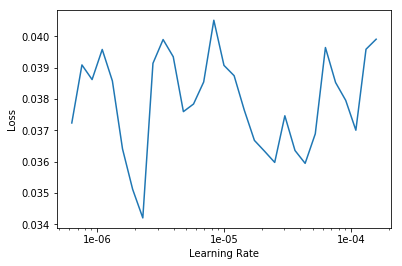

In [10]:
learn2.unfreeze()
learn2.lr_find()
learn2.recorder.plot()

In [11]:
learn2.fit_one_cycle(10, slice(1e-5, 1e-4))

epoch,train_loss,valid_loss,error_rate,accuracy,time
1,0.040178,0.173446,0.054348,0.945652,00:29
2,0.037108,0.187638,0.056522,0.943478,00:28
3,0.042343,0.162734,0.054348,0.945652,00:29
4,0.038099,0.131481,0.050000,0.950000,00:29
5,0.032893,0.154763,0.045652,0.954348,00:29
6,0.033958,0.166276,0.050000,0.950000,00:29
7,0.027451,0.166992,0.063043,0.936957,00:29
8,0.025050,0.185023,0.056522,0.943478,00:29
9,0.020996,0.170342,0.054348,0.945652,00:28
10,0.021424,0.163089,0.056522,0.943478,00:29


In [12]:
log_preds, y = learn2.TTA()
prob = np.exp(log_preds)
accuracy(log_preds, y)

tensor(0.9543)

In [13]:
data3 = ImageDataBunch.from_folder(path/'data1a','training','validation',ds_tfms=tfms, bs=64, size=224).normalize(imagenet_stats)
learn3 = create_cnn(data3, models.resnet152, pretrained=True, metrics=[error_rate, accuracy])

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


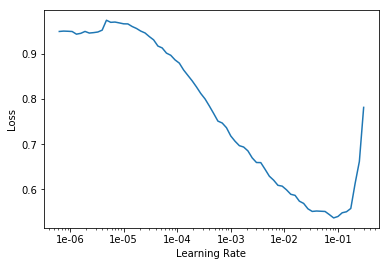

In [15]:
learn3.lr_find()
learn3.recorder.plot()

In [16]:
learn3.fit_one_cycle(10, slice(1e-3, 1e-2))

epoch,train_loss,valid_loss,error_rate,accuracy,time
1,0.353105,0.236146,0.082609,0.917391,00:16
2,0.254085,0.167912,0.065217,0.934783,00:16
3,0.221437,0.189214,0.071739,0.928261,00:16
4,0.189519,0.828351,0.258696,0.741304,00:17
5,0.157483,0.156624,0.056522,0.943478,00:16
6,0.125389,0.154610,0.060870,0.939130,00:16
7,0.105045,0.163612,0.050000,0.950000,00:16
8,0.083013,0.146502,0.050000,0.950000,00:16
9,0.063217,0.148349,0.047826,0.952174,00:16
10,0.044229,0.147330,0.052174,0.947826,00:16
